# Explore here

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2025-04-07 06:56:47.970823: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 06:56:48.077345: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 06:56:48.182295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744009008.352385    9962 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744009008.372093    9962 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744009008.514879    9962 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

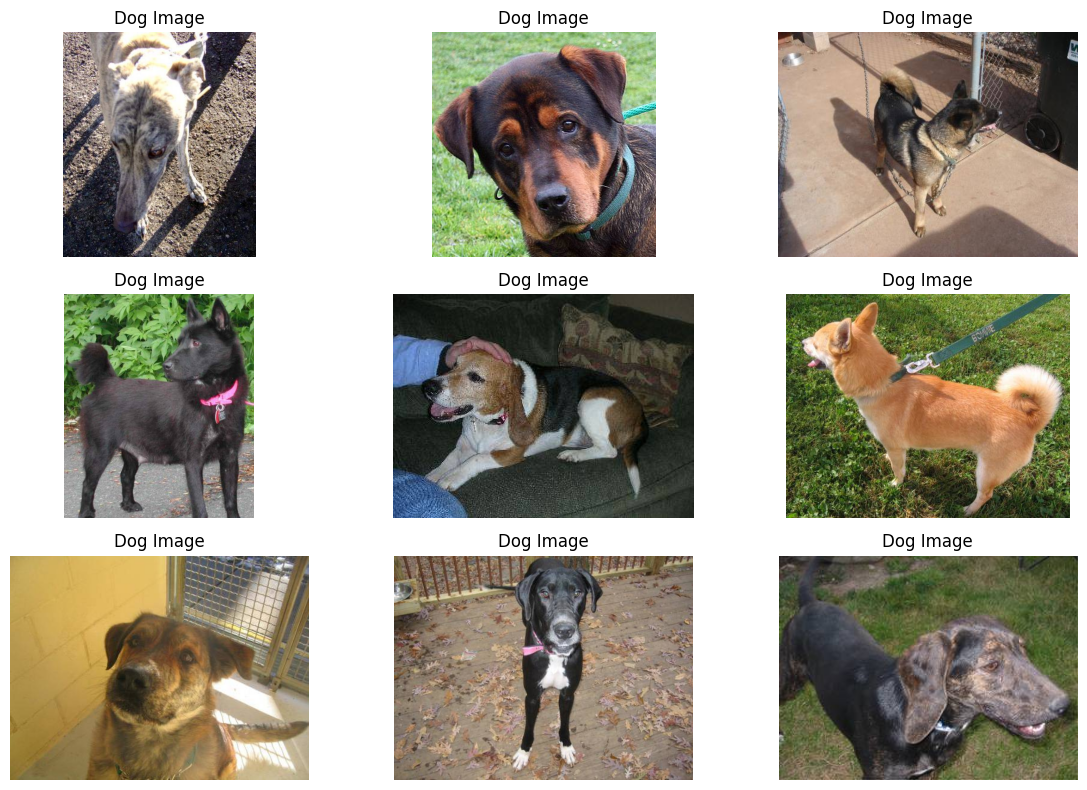

In [2]:
data_dir = "../data/train"

dog_subfolder = os.path.join(data_dir, "dog")

dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path) 
    img_array = image.img_to_array(img)
    img_array /= 255.0 
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

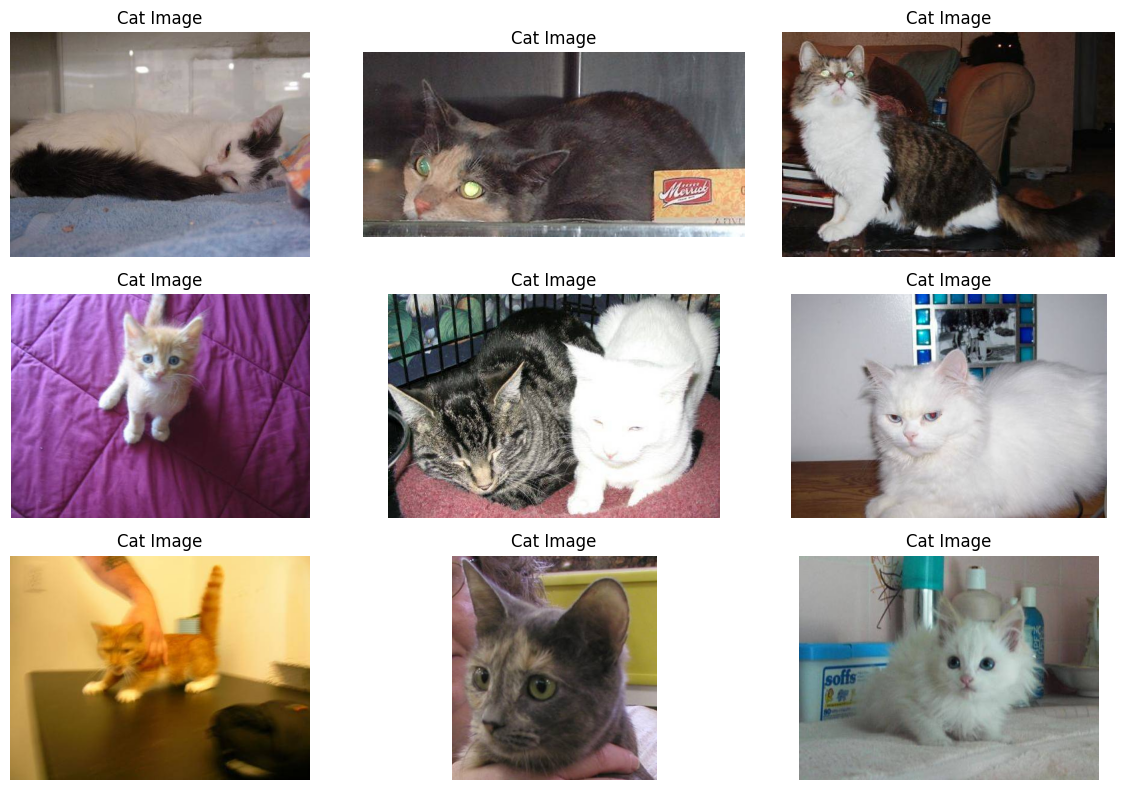

In [3]:
cats_subfolder = os.path.join(data_dir, "cat")

cats_image_files = os.listdir(cats_subfolder)

cats_images = []
for i in range(min(9, len(cats_image_files))): 
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "../data/train"
image_size = (220, 220)

datagentrain = ImageDataGenerator(rescale=1.0 / 255)
datagentest = ImageDataGenerator(rescale=1.0 / 255)

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical" 
)


test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical"
)

Found 2002 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [5]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()

# Capa convolucional 1
model.add(Conv2D(input_shape=(220, 220, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Capa convolucional 2
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Capa convolucional 3
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Capa convolucional 4
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Capa convolucional 5
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Capa densa
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))  # 2 clases: "dog" y "cat"

/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-07 06:57:13.575123: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-04-07 06:57:13.866131: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-04-07 06:57:14.363022: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-04-07 06:57:14.493423: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 301989888 exceeds 10% of free system memory.
2025-04

In [6]:
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [7]:
model.fit(
    train_data,
    epochs=1)

/home/vscode/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/63 ━━━━━━━━━━━━━━━━━━━━ 27:12 38s/step - accuracy: 0.4995 - loss: 0.7953

: 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3


 63/100 ━━━━━━━━━━━━━━━━━━━━ 6:04 10s/step - accuracy: 0.4955 - loss: 0.6933
Epoch 1: val_accuracy improved from -inf to 0.48438, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 651s 6s/step - accuracy: 0.4935 - loss: 0.6933 - val_accuracy: 0.4844 - val_loss: 0.6932
Epoch 2/3
 63/100 ━━━━━━━━━━━━━━━━━━━━ 6:03 10s/step - accuracy: 0.4950 - loss: 0.6933
Epoch 2: val_accuracy improved from 0.48438 to 0.53750, saving model to ../models/vgg16_1.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 650s 6s/step - accuracy: 0.4920 - loss: 0.6933 - val_accuracy: 0.5375 - val_loss: 0.6931
Epoch 3/3
 63/100 ━━━━━━━━━━━━━━━━━━━━ 6:03 10s/step - accuracy: 0.5193 - loss: 0.6931
Epoch 3: val_accuracy did not improve from 0.53750
100/100 ━━━━━━━━━━━━━━━━━━━━ 646s 6s/step - accuracy: 0.5122 - loss: 0.6932 - val_accuracy: 0.4875 - val_loss: 0.6933


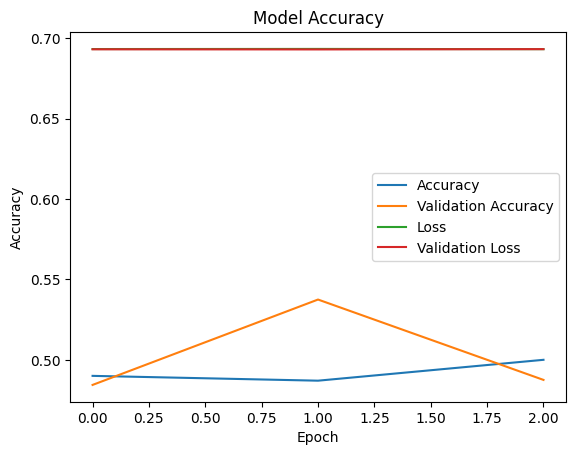

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
dog


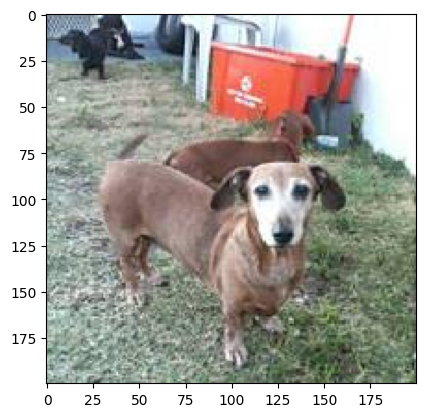

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/test/57.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

# Conclusiones

Al final, solo fue posible procesar 1000 imagenes de perros y 1000 de gatos debido a las capacidades de las computadoras con las que se contaba, y esto afecto en gran manera el accuracy obtenido. Para mejores resultados, se considera necesario procesar todo el paquete de datos.